## Mortality Outcomes for Females Suffering Myocardial Infarction

![title](mifem.png)

__Myocardial Infarction__ : This is medical name of a heart attack. Heart Attack is caused by regular blockage in oxygen flow to the heart. 

Most heart attacks result from atherosclerosis. The risk factors for heart attack and atherosclerosis are basically the same:

1. An abnormally high level of blood cholesterol (hypercholesterolemia)
2. An abnormally low level of HDL (high-density lipoprotein), commonly called "good cholesterol"
3. High blood pressure (hypertension)
4. Diabetes
5. Family history of coronary artery disease at an early age
6. Cigarette smoking
7. Obesity
8. Physical inactivity (too little regular exercise)

In early middle age, men have a greater risk of heart attack than women. However, a woman's risk increases once she begins menopause. This could be the result of a menopause-related decrease in levels of estrogen, a female sex hormone that may offer some protection against atherosclerosis.

__Description__
> The data frame has 1295 rows and 10 columns. This is the female subset of the 'monica' data frame 

Here, we are going to study/analyse mortality outcomes for females suffering from __Myocardial Infarction__.

Our dataset have following columns:
1. outcome (mortality outcome, a factor with levels live, dead)
2. age (age at onset)
3. yronset (year of onset)
4. premi (previous myocardial infarction event, a factor with levels y, n, nk not known )
5. smstat (smoking status, a factor with levels c current, x ex-smoker, n non-smoker, nk not known)
6. diabetes (a factor with levels y, n, nk not known)
7. highbp (high blood pressure, a factor with levels y, n, nk not known )
8. hichol (high cholesterol, a factor with levels y, n nk not known)
9. angina (a factor with levels y, n, nk not known) --> Type of chest pain caused due to reduced blood flow to the heart
10. stroke (a factor with levels y, n, nk not known)

__Source__
> Newcastle (Australia) centre of the Monica project; see the web site http://www.ktl.fi/monica 


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [81]:
data = pd.read_csv('DataSets//mifem.csv',na_values=["nk"])

#### In this dataset, there were columns like diabetes,smstat,highbp etc. which have values like 'nk' which means 'not known' which is a NaN value. For python to understand that and apply functions like 'dropna' and 'isna' we have passed it above to 'na_values' parameter of 'read_csv' function of pandas to convert it to 'NaN'. 

# Data Exploration

In [82]:
data = data.drop(labels='Unnamed: 0',axis=1)

In [67]:
data_live = len(data[data['outcome']=='live'])
data_dead = len(data[data['outcome']=='dead'])
data_live_p = (data_live/(data_dead+data_live))*100
data_dead_p = (data_dead/(data_dead+data_live))*100
print('Number of live people in our data are {}%  '.format((data_live_p)))
print('Number of dead people in our data are {}%  '.format((data_dead_p)))

Number of live people in our data are 75.2123552123552%  
Number of dead people in our data are 24.787644787644787%  


#### We have 75% of alive people data and 25% of dead people data. This might mislead the prediction due to lack of data of people who died due to Myocardial Infarction. 
__We will have to up-sample the dead people's train data to balance it.__

In [80]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1294
Data columns (total 10 columns):
outcome     1229 non-null object
age         1229 non-null int64
yronset     1229 non-null int64
premi       1214 non-null object
smstat      1180 non-null object
diabetes    1223 non-null object
highbp      1213 non-null object
hichol      1106 non-null object
angina      1195 non-null object
stroke      1214 non-null object
dtypes: int64(2), object(8)
memory usage: 105.6+ KB
None


,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,live,63,85,n,x,n,y,y,n,n
1,live,55,85,n,c,n,y,y,n,n
2,live,68,85,y,NaN,NaN,y,NaN,y,n
3,live,64,85,n,x,n,y,n,y,n
6,live,63,85,n,n,n,y,n,n,n


We have only two number type columns rest are object/string type.
Now, we have lot of not known values in our data. We need to do something about that

In [83]:
data.isna().sum()

outcome       0
age           0
yronset       0
premi        56
smstat      103
diabetes     69
highbp       76
hichol      188
angina       99
stroke       79
dtype: int64

In [84]:
data.dropna(thresh=4,inplace=True)
data.dropna(thresh=5,inplace=True)
data.dropna(thresh=6,inplace=True)
data.dropna(thresh=7,inplace=True)

In [86]:
print(data.isna().sum())
data[data.isna().any(axis=1)]

outcome       0
age           0
yronset       0
premi        15
smstat       49
diabetes      6
highbp       16
hichol      123
angina       34
stroke       15
dtype: int64


,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
2,live,68,85,y,NaN,NaN,y,NaN,y,n
8,dead,46,85,n,c,n,y,NaN,NaN,n
17,dead,61,85,NaN,n,y,y,n,y,y
21,live,64,85,n,n,y,y,NaN,n,n
46,live,56,85,n,n,n,y,NaN,y,n
56,dead,68,85,n,NaN,NaN,n,n,n,NaN
62,live,67,85,n,n,n,y,n,n,NaN
71,live,67,85,y,c,n,y,n,NaN,y
76,live,68,85,NaN,n,n,n,n,y,n
79,dead,64,85,n,n,n,NaN,NaN,y,y


"Outcome" is our target/response variable that has to be determined, it means whether the person will be alive or dead given that existing conditions (features/explanatory variables values) holds true. 

Other than 'Age' and 'Yronset', rest are categorical columns with values --> 'n' (no), 'y' ('yes') and 'nk' (not known).

# Visualizations

Text(0, 0.5, 'Frequency of Premi')

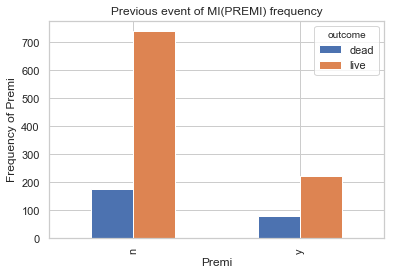

In [87]:
pd.crosstab(data.premi,data.outcome).plot(kind='Bar')
plt.title('Previous event of MI(PREMI) frequency')
plt.xlabel('Premi')
plt.ylabel('Frequency of Premi')

Previous Myocardial Infarction event seems to be a good perdictor

Text(0, 0.5, 'Frequency')

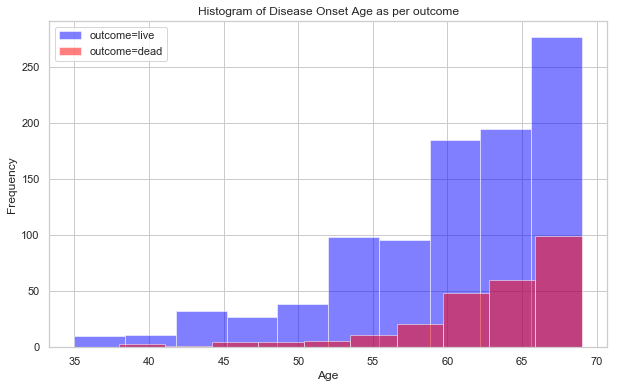

In [88]:
plt.figure(figsize=(10,6))
data[data['outcome']=='live']['age'].hist(alpha=0.5,color='blue',bins=10,label='outcome=live')
data[data['outcome']=='dead']['age'].hist(alpha=0.5,color='red',bins=10,label='outcome=dead')
plt.legend()
plt.title('Histogram of Disease Onset Age as per outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')

Majority of people's age of onset of disease in dataset lies between 59-69

Text(0.5, 1.0, 'Year wise frequency of disease onset')

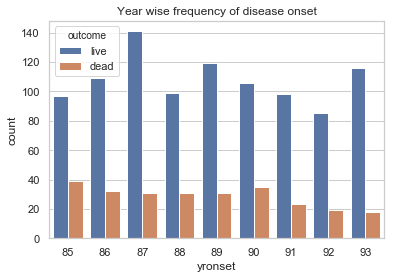

In [89]:
sns.countplot(data.yronset,hue=data.outcome)
plt.title('Year wise frequency of disease onset')

Here, we can see that deaths of people have declined after year '90 (Dead<30) compared to year '85 (60>Dead>50) 

Text(0, 0.5, 'Proportion of people alive')

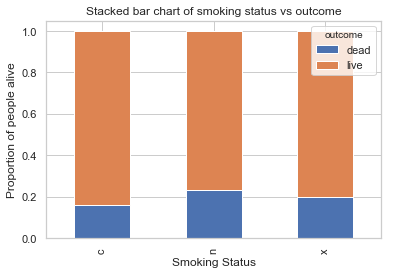

In [90]:
table = pd.crosstab(data.smstat,data.outcome)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar chart of smoking status vs outcome')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of people alive')

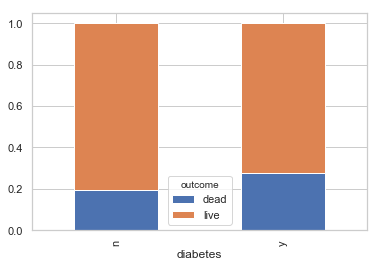

In [91]:
table = pd.crosstab(data.diabetes,data.outcome)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Text(0, 0.5, 'Frequency')

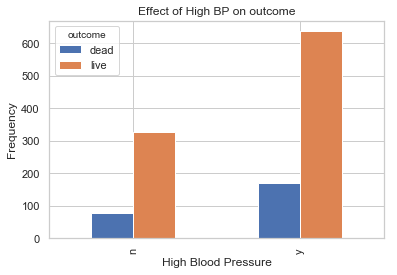

In [92]:
pd.crosstab(data.highbp,data.outcome).plot(kind='bar')
plt.title('Effect of High BP on outcome')
plt.xlabel('High Blood Pressure')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'High Cholestrol Frequency')

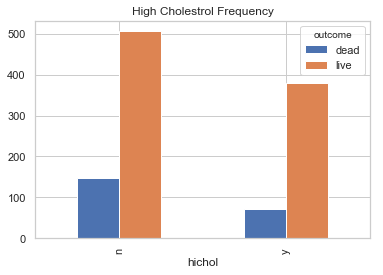

In [93]:
pd.crosstab(data.hichol,data.outcome).plot(kind='bar')
plt.title('High Cholestrol Frequency')

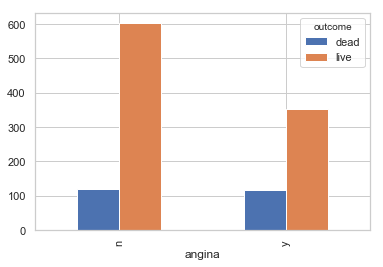

In [94]:
pd.crosstab(data.angina,data.outcome).plot(kind='bar')

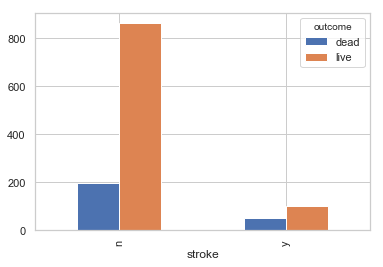

In [95]:
pd.crosstab(data.stroke,data.outcome).plot(kind='bar')

Alive people's proportion without diabetes, high cholestrol, Angina and no previous event of stroke is high.

In [96]:
data[(data['angina'].isin(['y','nk'])) & (data['hichol'].isin(['y','nk'])) &
     (data['diabetes'].isin(['y','nk'])) & (data['angina'].isin(['y','nk'])) & (data['stroke'].isin(['y','nk'])) 
     & (data['outcome']=='dead')].count()

outcome     3
age         3
yronset     3
premi       2
smstat      3
diabetes    3
highbp      3
hichol      3
angina      3
stroke      3
dtype: int64

## Creating Dummy variables

In [97]:
cat_vars = ['premi','smstat','diabetes','highbp','hichol','angina','stroke']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data = data1

In [98]:
cols = data.columns.values.tolist()

In [99]:
to_keep = [i for i in cols if i not in cat_vars]
data_final = data[to_keep]

In [100]:
data_final.head()

,outcome,age,yronset,premi_n,premi_y,smstat_c,smstat_n,smstat_x,diabetes_n,diabetes_y,highbp_n,highbp_y,hichol_n,hichol_y,angina_n,angina_y,stroke_n,stroke_y
0,live,63,85,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0
1,live,55,85,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0
2,live,68,85,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
3,live,64,85,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0
6,live,63,85,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0


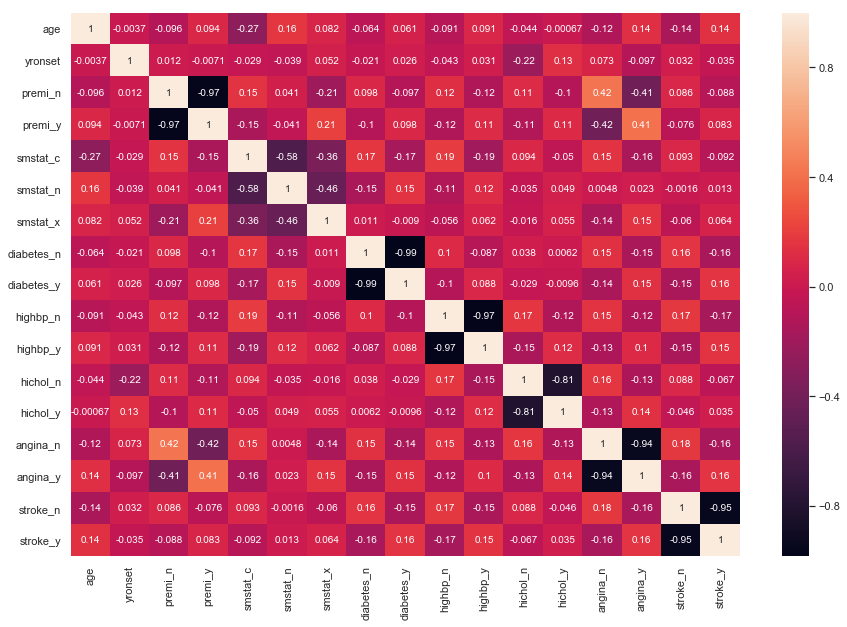

In [101]:
plt.figure(figsize=(15,10))
sns.heatmap(data_final.corr(),annot=True)

# Oversampling using SMOTE 

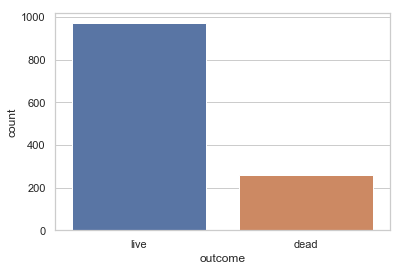

In [102]:
X = data_final.loc[:,data_final.columns != 'outcome']
Y = data_final.loc[:,data_final.columns == 'outcome']
sns.countplot(data.outcome)

#### This imbalance of data could affect the correlation between variables and affect the resut. We can balance the data through undersampling or oversampling. 
#### Undersampling is reducing the larger class (OUTCOME ='live') and bring it equal to smaller class ( OUTCOME = 'dead'). Oversampling is randomly generating samples of minority class("dead" here) and bring it equal to majority class ("live" in our dataset). This can be achieved through SMOTE ((Synthetic Minority Over-sampling Technique)).

We will be using oversampling here.

In [103]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
columns=X_train.columns

In [104]:
os_data_X,os_data_Y = os.fit_sample(X_train,Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_Y = pd.DataFrame(data=os_data_Y,columns=['outcome'])

F:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
print('Length of oversampled data is ',len(os_data_X))
print('length of people who died due to disease are ',len(os_data_Y[os_data_Y['outcome']=='dead']))
print('length of people who are alive with disease are ',len(os_data_Y[os_data_Y['outcome']=='live']))

Length of oversampled data is  1558
length of people who died due to disease are  779
length of people who are alive with disease are  779


Now we have a perfect balanced data! I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

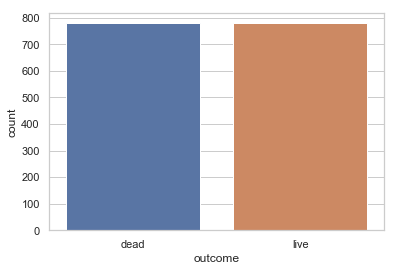

In [106]:
sns.countplot(os_data_Y.outcome)

### We can also see changes in the correlation values after oversampling

In [109]:
cols = data_final.columns
cols = list(data_final)
df = pd.DataFrame(data=os_data_X,columns=cols)
df = df.loc[:,df.columns != 'outcome']
df.head()

,age,yronset,premi_n,premi_y,smstat_c,smstat_n,smstat_x,diabetes_n,diabetes_y,highbp_n,highbp_y,hichol_n,hichol_y,angina_n,angina_y,stroke_n,stroke_y
0,67,86,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
1,38,92,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,66,88,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0
3,66,89,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0
4,57,86,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0


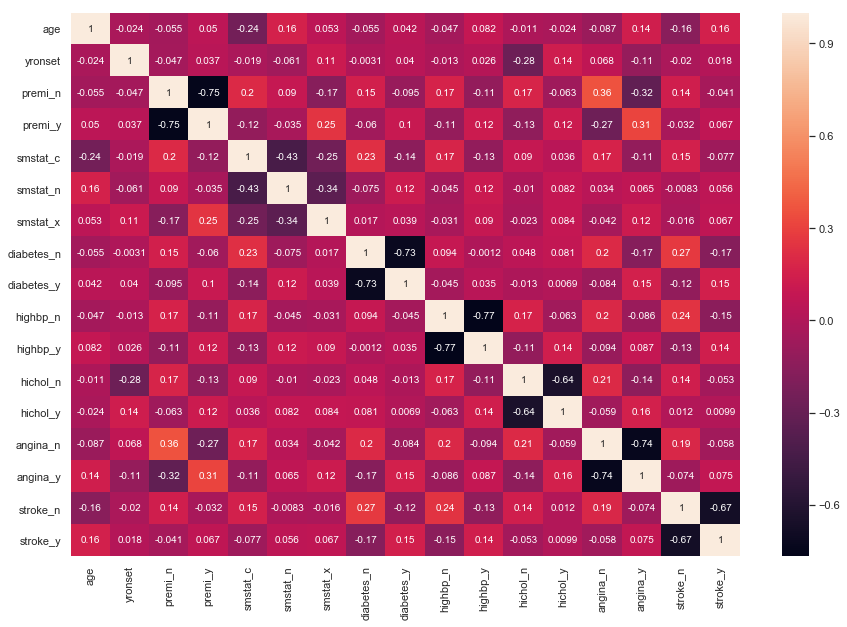

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [112]:
rfe = RFE(logreg,20)
rfe = rfe.fit(os_data_X,os_data_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [113]:
os_data_X.columns

Index(['age', 'yronset', 'premi_n', 'premi_y', 'smstat_c', 'smstat_n',
       'smstat_x', 'diabetes_n', 'diabetes_y', 'highbp_n', 'highbp_y',
       'hichol_n', 'hichol_y', 'angina_n', 'angina_y', 'stroke_n', 'stroke_y'],
      dtype='object')

From list of 24 columns RFE has helped us select 20 below features __'premi_n', 'premi_nk', 'premi_y', 'smstat_c',
       'smstat_n', 'smstat_nk', 'smstat_x', 'diabetes_n', 'diabetes_nk',
       'diabetes_y', 'highbp_n', 'highbp_y', 'hichol_n',
       'hichol_nk', 'hichol_y', 'angina_n', 'angina_y',
       'stroke_n', 'stroke_nk', 'stroke_y'__

In [115]:
cols = ['premi_n', 'premi_y', 'smstat_c', 'smstat_n', 'smstat_x', 'diabetes_n', 'diabetes_y', 'highbp_n', 'highbp_y', 'hichol_n', 'hichol_y', 'angina_n', 'angina_y', 'stroke_n', 'stroke_y']
X = os_data_X[cols]
Y = os_data_Y['outcome']

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
logreg.fit(X_train,Y_train)

F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
Y_predict_train = logreg.predict(X_train)
Y_predict_test = logreg.predict(X_test)

# Model Evaluation

#### Accuracy Score:

In [118]:
from sklearn.metrics import accuracy_score
print('Accuracy score of the data is ',accuracy_score(Y_test,Y_predict_test))

Accuracy score of the data is  0.8237179487179487


#### Confusion Matrix: 

In [119]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, Y_predict_test))
confusion_matrix.index = ['Actual Dead','Acutal Live']
confusion_matrix.columns = ['Predicted Dead','Predeicted Live']
print(confusion_matrix)

             Predicted Dead  Predeicted Live
Actual Dead             120               48
Acutal Live               7              137


This means correct prediction are __117+152 = 269__ and false are __40+5 = 45__

__Precision:__ It is the ‘Exactness’, ability of the model to return only relevant instances. If your use case/problem statement involves minimizing the False Positives, i.e. in current scenario if you don’t want the dead people to be labelled as 'Live' by the Model then Precision is something you need.

__Recall:__ It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity. In the current scenario if your focus is to have the least False Negatives i.e. you don’t alive people to be wrongly classified as 'Dead' then Recall can come to your rescue.

__F-measure:__
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
The F-Measure will always be nearer to the smaller value of Precision or Recall.

$Precision = TP/(TP+FP)$

$Recall = TP/(TP+FN)$

$F1 = 2*(Precision_/*Recall)/(Precision+Recall)$

In [120]:
prc = 152/(152+42)
print("Precision for live:",prc)
rec = 152/(152+5)
print("Recall for live :",rec)
f1 = 2*(prc*rec)/(prc+rec)
print('F1-Score :',f1)
prc1 = 117/(117+5)
print("Precision for dead:",prc1)
rec1 = 117/(117+42)
print("Recall for dead:",rec1)
f1 = 2*(prc1*rec1)/(prc1+rec1)
print('F1-Score :',f1)

Precision for live: 0.7835051546391752
Recall for live : 0.9681528662420382
F1-Score : 0.866096866096866
Precision for dead: 0.9590163934426229
Recall for dead: 0.7358490566037735
F1-Score : 0.8327402135231317


__High recall, low precision:__ This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

__Low recall, high precision:__ This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

In [121]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

        dead       0.94      0.71      0.81       168
        live       0.74      0.95      0.83       144

    accuracy                           0.82       312
   macro avg       0.84      0.83      0.82       312
weighted avg       0.85      0.82      0.82       312



#### From confusion matrix we can see that Recall for class 'Live' is 0.96. This means we have few number of False Negative i.e., instances where people who are 'dead' are labelled 'live' is less. 
#### Comparatively we have more cases of False Positives i.e., instances of 'live' people being labelled 'dead'. 